# Prepare the Notebook environment:

In [22]:
!pip install --upgrade pip
!pip uninstall joblib scikit-learn -y
!pip install scikit-learn==0.24.2 joblib==1.1.0
!pip show joblib

Found existing installation: joblib 1.2.0
Uninstalling joblib-1.2.0:
  Successfully uninstalled joblib-1.2.0
Found existing installation: scikit-learn 0.24.2
Uninstalling scikit-learn-0.24.2:
  Successfully uninstalled scikit-learn-0.24.2
  Using cached scikit_learn-0.24.2-cp311-cp311-macosx_13_0_x86_64.whl
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
Name: joblib
Version: 1.1.0
Summary: Lightweight pipelining with Python functions
Home-page: https://joblib.readthedocs.io
Author: Gael Varoquaux
Author-email: gael.varoquaux@normalesup.org
License: BSD
Location: /usr/local/lib/python3.11/site-packages
Requires: 
Required-by: scikit-learn


# Registry setup:

[https://registry-external-ref.fly.dev/](https://registry-external-ref.fly.dev/)

# External S3:

[https://registry-external-ref-minio.fly.dev/](https://registry-external-ref-minio.fly.dev/)

# Install the Model Registry Python Client:

In [1]:
!pip install --upgrade rhods-model-registry-poc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: apicurio-registry-python-sdk-preview
    Found existing installation: apicurio-registry-python-sdk-preview 2.4.13
    Uninstalling apicurio-registry-python-sdk-preview-2.4.13:
      Successfully uninstalled apicurio-registry-python-sdk-preview-2.4.13
  Attempting uninstall: rhods-model-registry-poc
    Found existing installation: rhods-model-registry-poc 0.1.5
    Uninstalling rhods-model-registry-poc-0.1.5:
      Successfully uninstalled rhods-model-registry-poc-0.1.5


# Define and train a model:

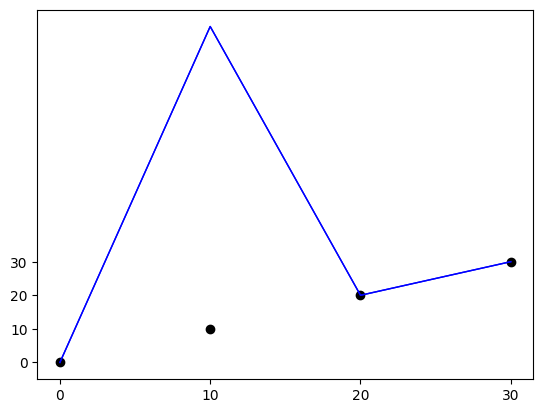

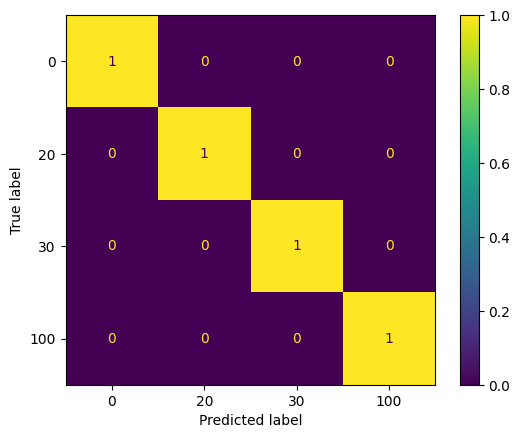

In [23]:
import numpy as np
from sklearn.svm import SVC

X = np.array([[0, 0], [10, 10], [20, 20], [30, 30]])
y = np.array([0, 100, 20, 30])
clf = SVC()
clf.fit(X, y)

# store the model
import joblib
joblib.dump(clf, 'example.joblib')

# plot the visualization
import matplotlib.pyplot as plt

plt.scatter([0, 10, 20, 30], [0, 10, 20, 30], color="black")
plt.plot(X, y, color="blue", linewidth=1)

plt.xticks([0, 10, 20, 30])
plt.yticks([0, 10, 20, 30])

plt.show()

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X, y)

# Upload a model to Registry:

In [24]:
import os
import sys
from model_registry_python_sdk.client import ModelRegistryClient

client = ModelRegistryClient()
await client.register_model("example.joblib", os.path.join(sys.path[0], "example.joblib"),
    "my fantastic description",
    {
      "framework": "scikit-learn",
      "tag": "experimental",
      "creator": "andreaTP",
      "link": "https://huggingface.co/NimaBoscarino/evaluate-test"
    }, ["staging", "validate"])

'cd799d9e-b5c1-4d81-a81e-a7a05f7c1f65'

# Deploy the model using ModelMesh:

In [18]:
from IPython.display import IFrame
IFrame('http://localhost:3000/wetty/ssh/aperuffo', width=1400, height=400)

# cd /Users/aperuffo/workspace/rhods-model-registry-poc/sync-operator/src/main/resources/examples

# Run predictions:

In [11]:
# curl 'http://localhost:8008/v2/models/simple-latest/infer' \
#   --data-raw '{"model_name":"basic","inputs":[{"name":"predict","shape":[1,2],"datatype":"FP32","data":[["0","0"]]}]}'

In [21]:
from IPython.display import IFrame
IFrame('http://localhost:8000', width=700, height=150)